In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#checking the Total No of Rows and Columns
df.shape

(30, 17)

In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
#checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
"""Here, we can see No Null values present in dataset"""

'Here, we can see No Null values present in dataset'

In [7]:
#checking for duplicated value
df.duplicated().sum()

0

In [8]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

W
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64


R
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: count, dtype: int64


AB
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: count, dtype: int64


H
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [10]:
"""From above observation in the dataset 2 Types of data are present float64 and int64 with the memory usage"""

'From above observation in the dataset 2 Types of data are present float64 and int64 with the memory usage'

In [11]:
#statistical summary of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


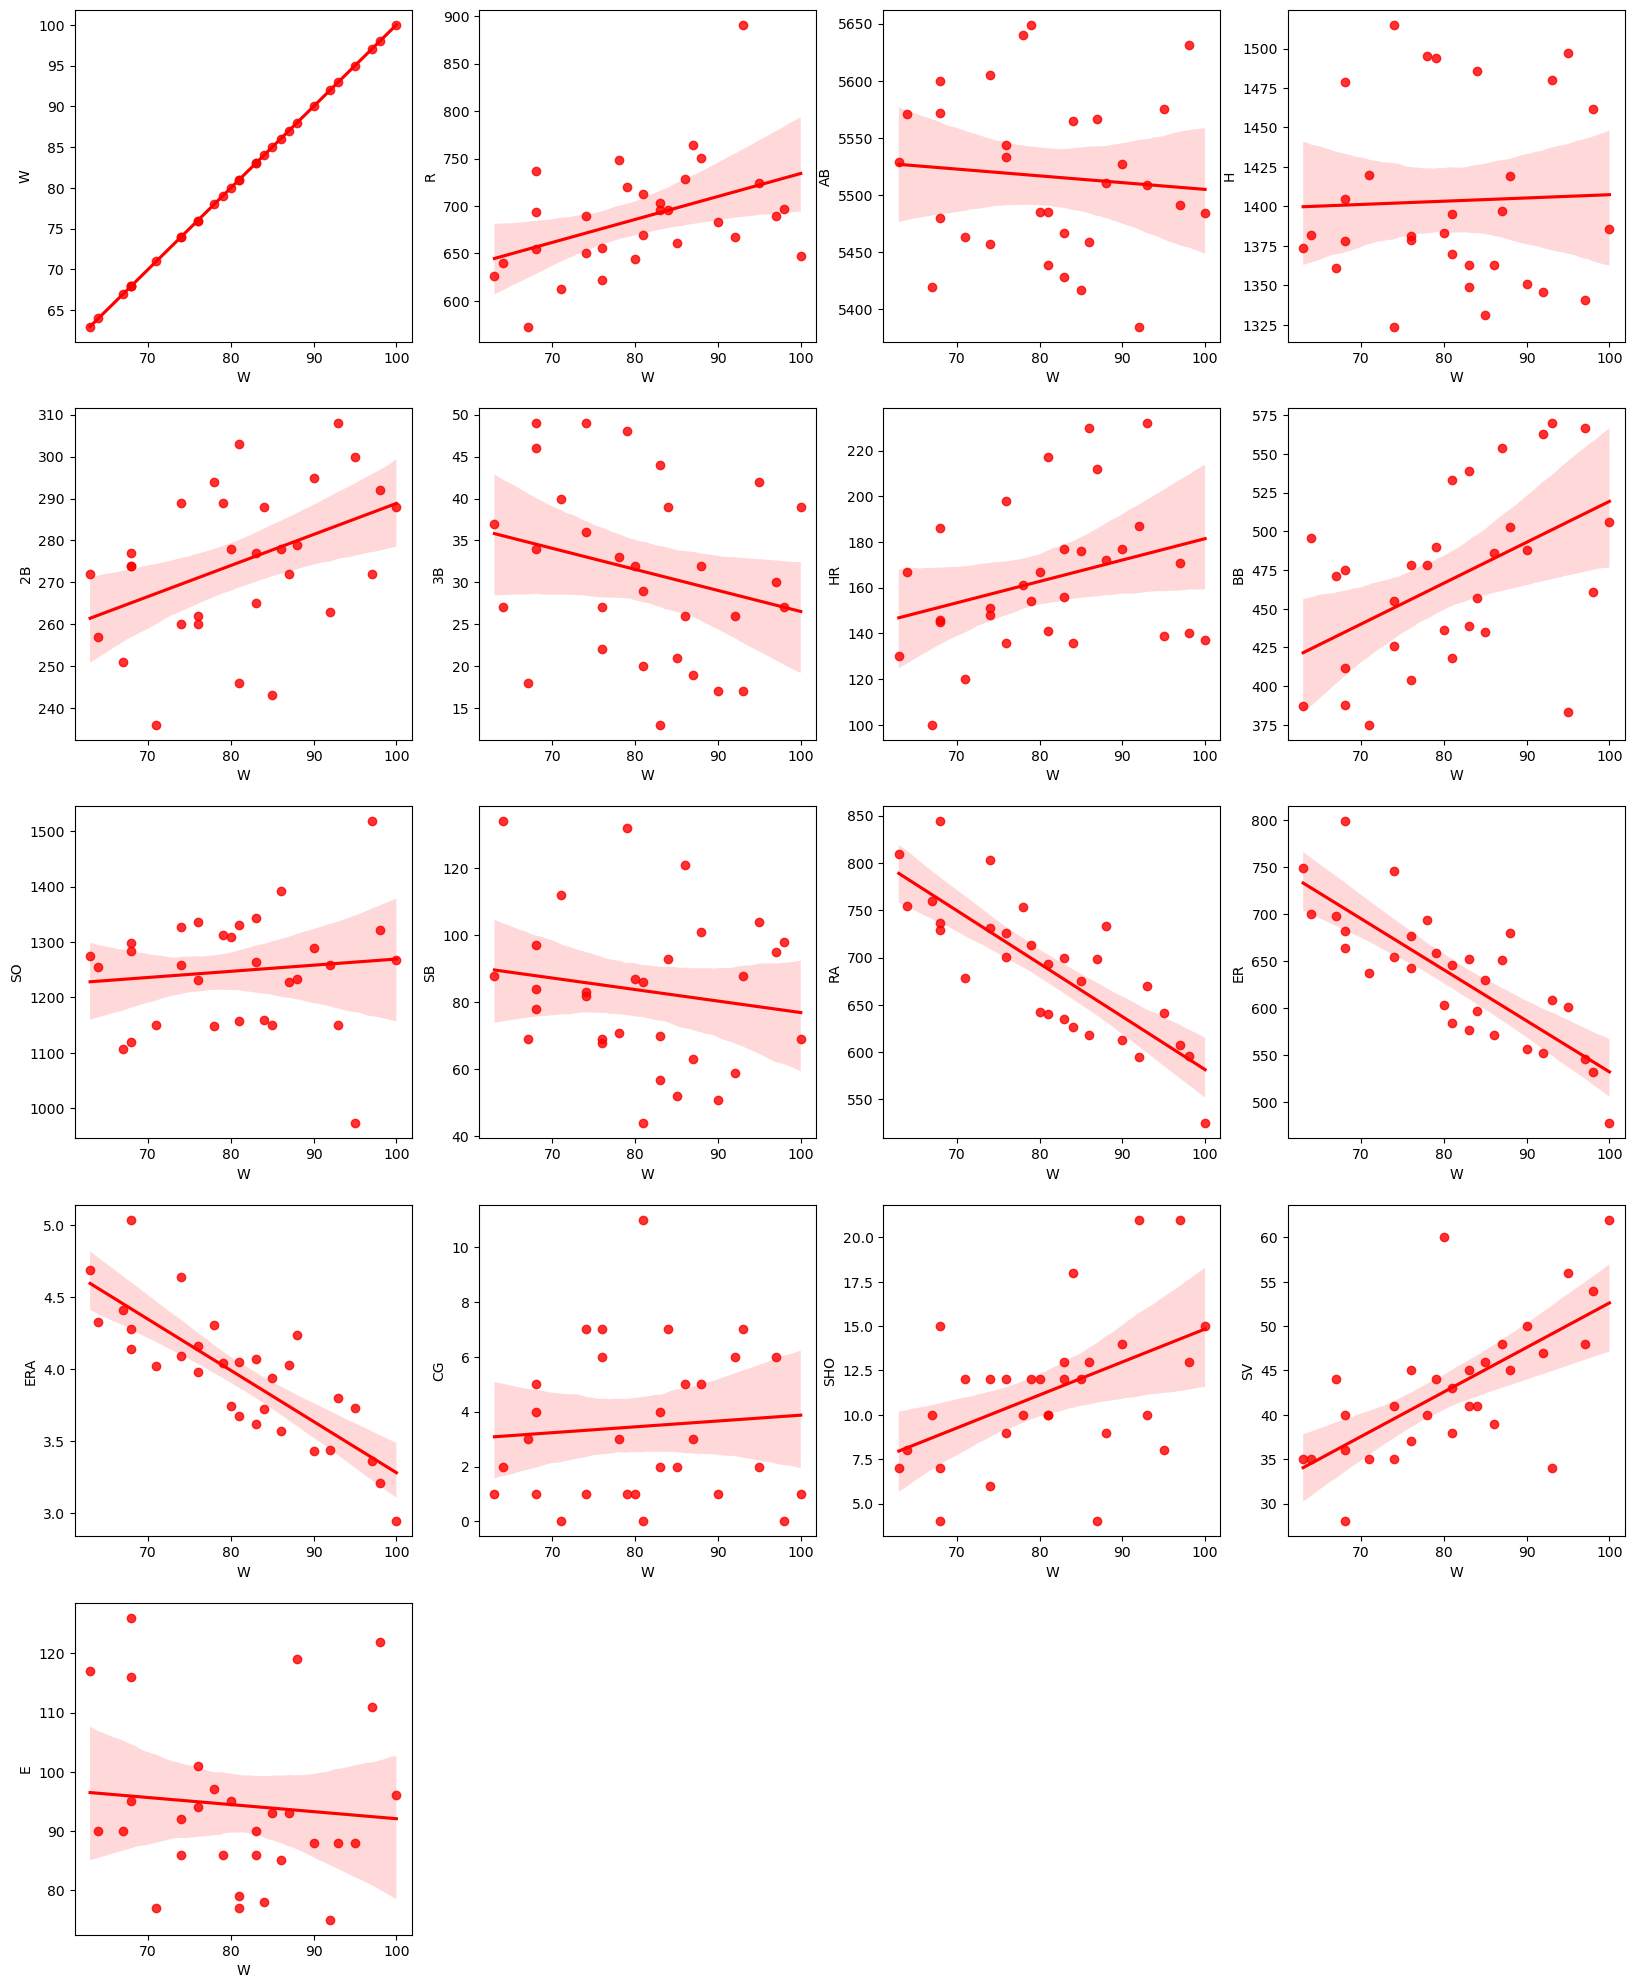

In [36]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='W',y=i,data=df,color='r')
        plt.xlabel("W")
        plt.ylabel(i)
    p+=1
plt.show()

In [38]:
"""From above graph Runs,SV are linearly related to win. And RA,ER,ERA is highly related to win.E,SB,CG are not related 
with Win.H is weekly related to win"""

'From above graph Runs,SV are linearly related to win. And RA,ER,ERA is highly related to win.E,SB,CG are not related \nwith Win.H is weekly related to win'

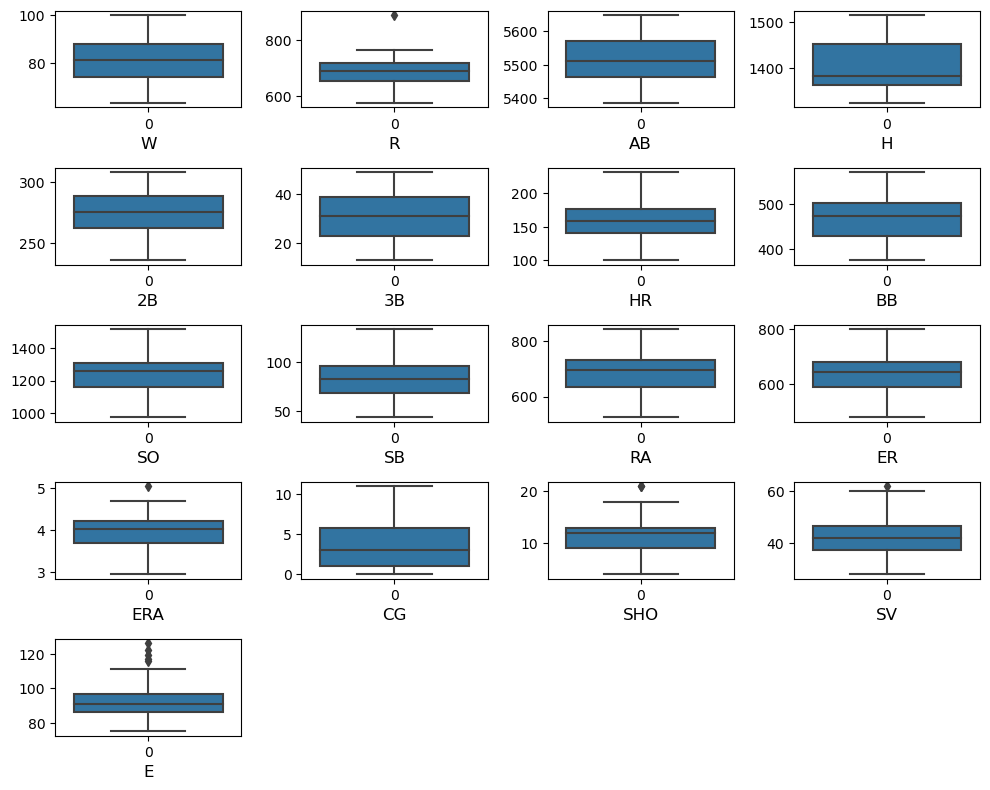

In [39]:
#checking the outliers using boxplot
plt.figure(figsize=(10,8))
plotnumber=1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[col],palette="tab10")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [40]:
"""From above observations we can see the Outliers are present in R,ERA,SHO,SV,E.using zscore and IQR Technique we 
can remove outliers"""

'From above observations we can see the Outliers are present in R,ERA,SHO,SV,E.using zscore and IQR Technique we \ncan remove outliers'

In [41]:
from scipy.stats import zscore
z_score=zscore(df[['R','ERA','SHO','SV','E']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [42]:
#after removing outliers
df.shape

(29, 17)

In [43]:
"""After removing the outliers dataset contains 29 rows and 17 columns """

'After removing the outliers dataset contains 29 rows and 17 columns '

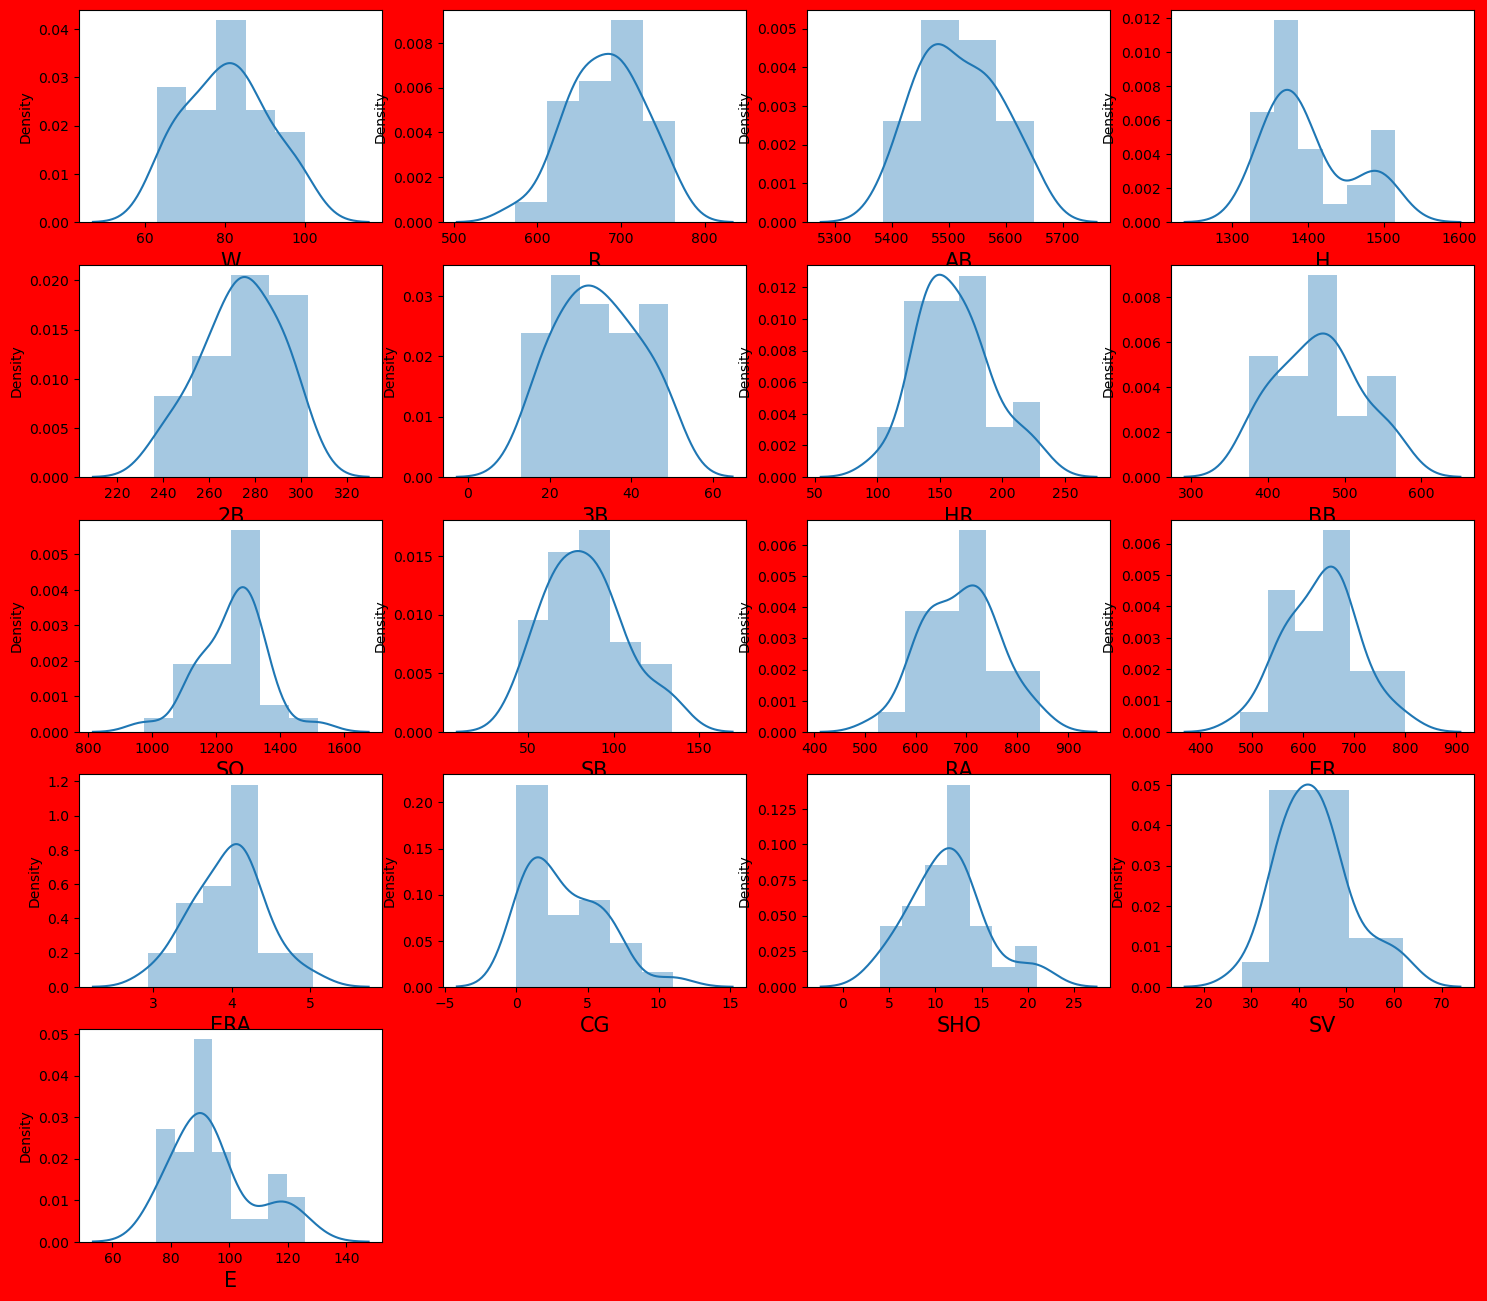

In [44]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='r')
p=1
for col in df:
    if p<=17:
        ax=plt.subplot(5,4,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    p+=1
plt.show()

In [45]:
"""Here we can see the data is right skewed for almost all the columns"""

'Here we can see the data is right skewed for almost all the columns'

In [46]:
#checking skewness
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [86]:
#Using cube root method we can remove skewness
df['H']=np.cbrt(df['H'])
df['CG']=np.cbrt(df['CG'])
df['SV']=np.cbrt(df['SV'])
df['E']=np.cbrt(df['E'])

In [87]:
#again checking skewness
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -2.420630
SHO    0.526943
SV     0.280963
E      0.613073
dtype: float64

In [88]:
#checking the correlation between features and target
cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.019968,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,-0.070408,0.497526,0.755967,-0.074778
R,0.390451,1.000000,0.438022,0.432686,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.097166,-0.085108,0.074712,0.041358
AB,-0.085780,0.438022,1.000000,0.769847,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.053679,-0.198872,-0.132717,0.321269
H,-0.019968,0.432686,0.769847,1.000000,0.527588,0.580521,-0.219048,-0.221951,-0.372834,0.419443,0.243965,0.280165,0.256080,-0.057574,-0.137101,-0.093453,-0.013732
2B,0.384886,0.469293,0.490752,0.527588,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.307757,0.084060,0.254589,0.146754
3B,-0.206737,0.134204,0.445604,0.580521,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,0.068372,-0.058896,-0.244604,0.099561
HR,0.245697,0.586894,-0.064653,-0.219048,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.064040,0.005546,0.089909,-0.183185
BB,0.447513,0.258450,-0.137850,-0.221951,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.375383,0.473922,0.200162,-0.052153
SO,0.156469,0.081158,-0.111243,-0.372834,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.066569,0.231230,0.110550,0.151682
SB,-0.169503,0.075323,0.373674,0.419443,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.029266,-0.104602,-0.189903,0.078479


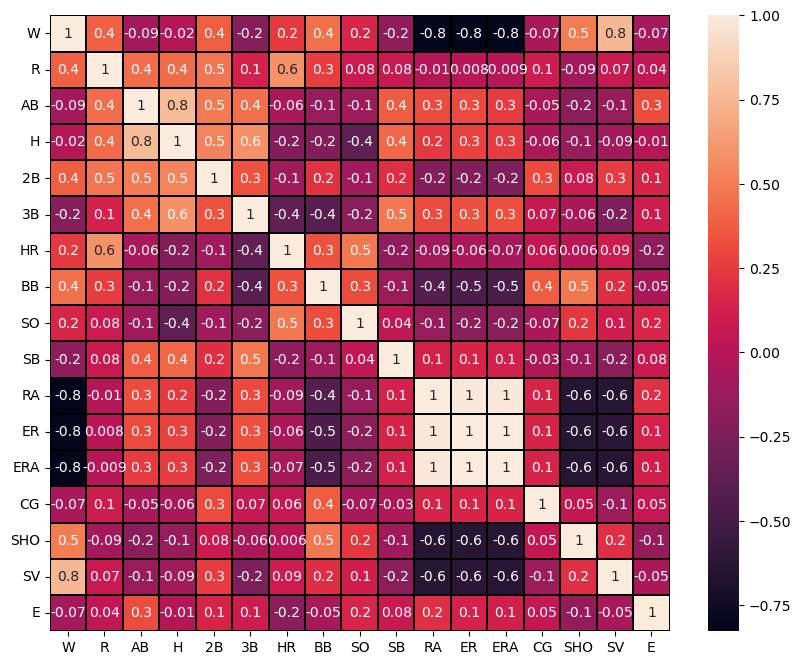

In [89]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [90]:
"""From the above observations we can say that Save(SV),ShutOut(SHO),walk(BB),StrikeOut(SO),Home Runs(HR),second base(2B),
Runs(R) is Positively correlated with target variable i.e. Win(W) column.
and RA,ER,ERA are Highly negatively correlated with target variable."""

'From the above observations we can say that Save(SV),ShutOut(SHO),walk(BB),StrikeOut(SO),Home Runs(HR),second base(2B),\nRuns(R) is Positively correlated with target variable i.e. Win(W) column.\nand RA,ER,ERA are Highly negatively correlated with target variable.'

In [91]:
#We can observe the positive and negative correlated features with the target
cor['W'].sort_values(ascending = False)

W      1.000000
SV     0.755967
SHO    0.497526
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
SO     0.156469
H     -0.019968
CG    -0.070408
E     -0.074778
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
Name: W, dtype: float64

In [92]:
#separating features and label
x=df.drop("W",axis=1)
y=df["W"]

In [93]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.728647,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,0.194338,-0.813262,1.586882,-0.439713
1,0.331147,-0.702831,-0.946162,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.194338,0.159299,0.270050,-0.600240
2,-0.274666,-1.100253,-0.094708,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,0.828644,-0.326982,-0.684238,-1.189518
3,-1.329231,0.233951,-0.351839,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,0.648597,-0.570122,-0.829907,0.531016
4,0.174084,1.255894,2.041742,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.648597,0.159299,-1.129315,-0.600240
5,1.856900,0.716535,-0.058116,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.334500,-1.785822,0.648734,-0.052155
6,0.712585,-0.447345,-0.555092,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-2.847257,-0.326982,0.008146,-1.366410
7,-0.835605,-0.447345,-0.315000,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.031121,0.159299,2.022638,0.097700
8,1.497899,1.752672,1.693704,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.334500,-0.326982,-0.400394,0.244776
9,1.565212,-0.078310,0.342114,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.520315,-0.570122,0.270050,1.706009


In [94]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,7.100809,R
1,15.227151,AB
2,9.080843,H
3,4.161458,2B
4,3.365466,3B
5,8.546860,HR
6,3.609363,BB
7,2.955700,SO
8,1.947412,SB
9,198.917643,RA


In [96]:
"""By checking VIF values we can find the features causing multicollinarity problem.here we can
find the feature RA,ER,ERA have HIGH VIF value which means they have high correlation
with other features.we will drop one of the column """

#Dropping ER column
x.drop("ER",axis=1,inplace=True)

In [98]:
#again checking value to confirm wether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,6.073551,R
1,6.898150,AB
2,8.959719,H
3,3.968734,2B
4,3.335827,3B
5,7.172595,HR
6,3.592786,BB
7,2.936104,SO
8,1.838097,SB
9,146.953771,RA


In [99]:
"""We can see the RA and ERA features having high VIF values so now we will drop the RA feature column """
x.drop("RA",axis=1,inplace=True)

In [100]:
#again checking value to confirm wether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,6.071158,R
1,4.173015,AB
2,7.557098,H
3,3.934667,2B
4,3.307999,3B
5,6.094963,HR
6,3.159984,BB
7,2.400697,SO
8,1.786202,SB
9,6.014439,ERA


In [101]:
"""so,we have solved multicollinearity issue."""

'so,we have solved multicollinearity issue.'

In [102]:
# .....FINDING BEST RANDOM STATE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [103]:
#creating train test split
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"on Random state",maxRs)

Maximum r2 score is  0.921693268990749 on Random state 189


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRs)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge

In [106]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_LR)))

R2_score: 0.921693268990749
R2_score on training data: 88.70946113725137
Mean Absolute Error: 2.8233672077295466
Mean Squared Error: 13.507911099095795
Root Mean Squared Error: 1.6802878347859174


In [107]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_RFR)))

R2_score: 0.627303695652174
R2_score on training data: 92.19096997014576
Mean Absolute Error: 7.31875
Mean Squared Error: 64.29011249999999
Root Mean Squared Error: 2.705318835183757


In [108]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)

print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_lasso)))

R2_score: 0.894198370547894
R2_score on training data: 82.67048195854991
Mean Absolute Error: 3.6283627814059436
Mean Squared Error: 18.25078108048828
Root Mean Squared Error: 1.904826181415497


In [109]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)

print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_rd)))

R2_score: 0.9414058046731136
R2_score on training data: 87.89164742975673
Mean Absolute Error: 2.404938674874579
Mean Squared Error: 10.107498693887903
Root Mean Squared Error: 1.5507864697870493


In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR)-score.mean())*100)

[ 0.24377248 -1.06793284  0.58621491  0.64873738  0.67600171]
0.2173587257843061
Difference between R2 score and cross validation score is : 70.4334543206443


In [112]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[ 0.43121057 -4.70434079  0.45594488  0.39838492  0.85157134]
-0.5134458164597595
Difference between R2 score and cross validation score is : 114.07495121119335


In [113]:
score2=cross_val_score(lasso,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso)-score3.mean())*100)

[ 0.74261749 -1.0695952   0.74048146  0.78211419  0.87722354]
0.4145682952735331
Difference between R2 score and cross validation score is : 47.96300752743608


In [114]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd)-score4.mean())*100)

[ 0.41826182 -1.19196359  0.64504215  0.86810423  0.83325454]
0.31453982665648933
Difference between R2 score and cross validation score is : 62.68659780166244


In [115]:
"""From the difference between both R2 score and cross validation score computed on R2 score we 
can conclude that Lasso Regression as our best fitting and best performing model"""

'From the difference between both R2 score and cross validation score computed on R2 score we \ncan conclude that Lasso Regression as our best fitting and best performing model'

In [116]:
from sklearn.model_selection import GridSearchCV

In [118]:
param={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
      
      
      }
gscv=GridSearchCV(Lasso(),param,cv=5,scoring='neg_mean_squared_error')
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [119]:
gscv.best_params_

{'alpha': 1.0, 'fit_intercept': True}

In [120]:
model=Lasso(alpha=1.0,fit_intercept=True)

In [121]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred)))

R2_score: 0.894198370547894
Mean Absolute Error: 3.6283627814059436
Mean Squared Error: 18.25078108048828
Root Mean Squared Error: 1.904826181415497


In [122]:
import joblib
import pickle
filename='Baseball.pkl'
pickle.dump(model,open(filename,'wb'))#saved model

In [123]:
new_model=pickle.load(open('Baseball.pkl','rb'))
result=new_model.score(x_test,y_test)
print(result*100)

89.4198370547894


In [125]:
conclusion=pd.DataFrame([new_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7
Predicted,96.502448,81.432679,68.029893,71.035606,66.053316,87.217998,76.624752,85.56354
Original,100.000000,88.000000,68.000000,64.000000,63.000000,92.000000,74.000000,87.00000


In [ ]:
>>In this dataset No null and duplicate values.
>>dataset contains total 30 rows with 17 columns.
>>Done the Data Visualization of Wins.
>>Using regplot and subplot Runs,SV are linearly related to win. And RA,ER,ERA is highly related to win.E,SB,CG are not related 
  with Win.H is weekly related to win.
>>Removing outliers using Zscore and IQR techniques.
>>Removing skewness using Cube root method.
>>visualizing the correlation matrix by plotting heatmap.
>>separating features and label.
>>Feature Scaling using Standard Scalarization.
>>Solving Multicollinearity problem using Variance Inflation Factors.
>>Finding best random state and creating train test split.
>>Target variable have the contineous data therefore using Regression model for prediction of Wins.
>>Finding cross validation score on various models.
>>From the difference between both R2 score and cross validation score computed on R2 score we can conclude that 
  Lasso Regression as our best fitting and best performing model
>>The best score is 89.41% for prediction of Win.